FALTAN COSAS, NO ESTÁ ACABADO

In [15]:
%pylab
%matplotlib inline
from ipywidgets import interact

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [365]:
def cconv(x1, x2, N=None):
    import scipy.linalg as lg

    # Como señales sería algo así
    # if N == None:
    #     N = x1.length() + x2.length() - 1
    # r = range(0, N)
    # x1e = x1.compute(r)
    # x2e = x2.compute(r)
    # return x1e.dot(lg.circulant(x2e).T)
    
    # xk.data lengths
    x1l = x1.shape[0]
    x2l = x2.shape[0]
    
    # if N not specified, set large enough 
    if N == None:
        N = x1l+x2l-1

    # force x1.data of length N 
    if x1l >= N:
        x1e = x1[0:N]
    else:
        x1e = np.r_[x1, [0]*(N-x1l)]
    
    # force x2.data of length N 
    x2l = len(x2)
    if x2l >= N:
        x2e = x2[0:N]
    else:
        x2e = np.r_[x2, [0]*(N-x2l)]
    
    # compute circular convolution
    return x1e.dot(lg.circulant(x2e).T)

In [373]:
offy = 0.5
offx = 0.5
Mmax = 10
def ccdemo(P=4, L=5, M=7, n1=0):
    h = r_[[1.0]*P, [0.0]*(M-P)]
    ht = tile(h, 3)
    h0 = r_[[0.0]*M, h, [0.0]*M]
    x = r_[1.0+arange(L), [0.0]*(M-L)]
    x = x/max(x)
    xf = x[::-1]
    xf0 = r_[[0.0]*(n1+1), xf, [0.0]*(2*M-(n1+1))]
    y0 = convolve(h[:P], x[:L])
    xt = r_[xf[-1], tile(xf, 3)[:-1]]
    n = arange(-M, 2*M)
    figure(figsize(12, 5))
    subplot(3, 2, 1)
    stem(n, ht, markerfmt='or', basefmt='k', linefmt='r')
    axhline(0, color='k')
    for k in range(-M, 2*M, M):
        axvline(k, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, 1+offy])
    subplot(3, 2, 3)
    stem(n, xt, markerfmt='ob', basefmt='k', linefmt='b')
    axhline(0, color='k')
    for k in range(-M, 2*M, M):
        axvline(k, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, 1+offy])
    subplot(3, 2, 2)
    stem(n, h0, markerfmt='or', basefmt='k', linefmt='r')
    axhline(0, color='k')
    axvline(0, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, 1+offy])
    subplot(3, 2, 4)
    stem(n, xf0, markerfmt='ob', basefmt='k', linefmt='b')
    axhline(0, color='k')
    axvline(0, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, 1+offy])
    subplot(3, 2, 5)
    yc = cconv(h[:P], x[:L], M)
    stem(n, tile(yc, 3), markerfmt='om', basefmt='k', linefmt='m')
    axhline(0, color='k')
    axvline(0, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, max(y0)+offy])
    subplot(3, 2, 6)
    ns = min(n1, len(y0)-1)
    y = r_[[0.0]*M, y0[0:ns+1], [0.0]*(2*M-(L+P-1)+(L+P-1)-(ns+1))]
    stem(n, y, markerfmt='om', basefmt='k', linefmt='m')
    axhline(0, color='k')
    axvline(0, color='k', ls='--')
    axis([n[0]-offx, n[-1]+offx, -1-offy, max(y0)+offy])


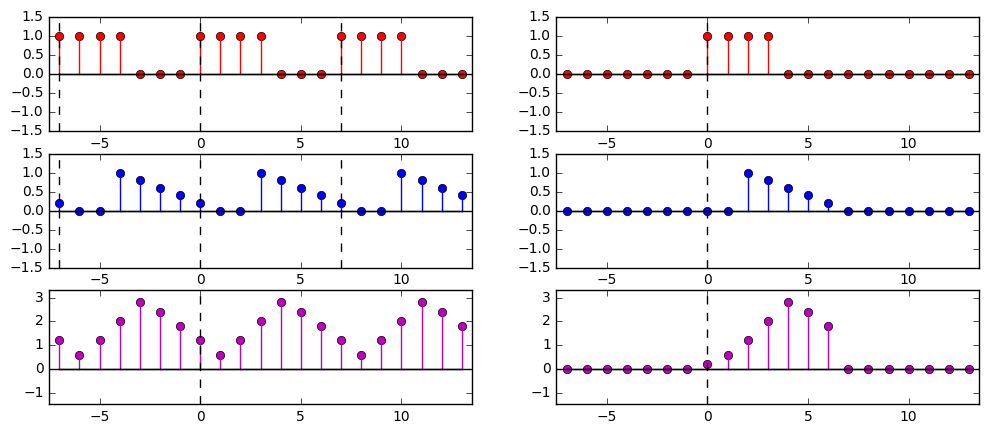

In [374]:
interact(ccdemo, P=(1, Mmax), L=(1, Mmax), M=(1, Mmax), n1=(0, Mmax));